참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# PyTorch란?

파이토치는 예전의 토치(Torch) 및 카페2(Caffe2) 프레임워크를 기반으로 한다. 이름에서 짐작하겠지만 파이토치는 파이썬을 스크립팅 언어로 사용하며, 진화된 토치 C/CUDA 백엔드를 사용한다. 카페2의 프로덕션 기능은 현재 파이토치 프로젝트로 편입되는 중이다.

흔히 파이토치를 "강력한 GPU 가속이 적용되는 파이썬으로 된 텐서와 동적 신경망"이라고 한다.

# PyTorch 패지키의 구성 요소

- `torch`
  + main namespace로 tensor등의 다양한 수학 함수가 패키지에 포함되어 있습니다.
  + NumPy와 같은 구조를 가지고 있어서 numpy와 상당히 비슷한 문법 구조를 가지고 있습니다.
- `torch.autograd`
  + 자동 미분을 위한 함수가 포함되어 있습니다.
  + 자동 미분의 on, off를 제어하는 enable_grad 또는 no_grad나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 Function등이 포함됩니다.
- `torch.nn`
  + 신경망을 구축하기 위한 다양한 데이터 구조나 레이어가 정의되어 있습니다.
  + CNN, LSTM, 활성화 함수(ReLu), loss 등이 정의되어 있습니다.
- `torch.optim`
  + SGD 등의 파라미터 최적화 알고리즘 등이 구현되어 있습니다.
- `torch.utils.data`
  + Gradient Descent 계열의 반복 연산을 할 때, 사용하는 미니 배치용 유틸리티 함수가 포함되어 있습니다.
- `torch.onnx`
  + ONNX(Open Neural Network eXchange) 포맷으로 모델을 export 할 때 사용합니다.
  + ONNX는 서로 다른 딥러닝 프레임워크 간에 모델을 공유할 때 사용하는 새로운 포맷입니다.

# PyTorch 튜토리얼 - 텐서 (Tensor)

## 텐서의 생성과 변환

- 텐서는 pytorch의 가장 기본이 되는 데이터 구조와 기능을 제공하는 다차원 배열을 처리하기 위한 데이터 구조입니다.
  + 벡터 = 1차원 텐서, 2차원 행렬 = 2차원 텐서,  3차원 텐서, 4차원 텐서, ...

<img src='https://drive.google.com/uc?export=download&id=1bFmkkQL-nD_CH0oN_xw5sv_jxlQbg1e5' width="300" height ="250" /><br>

- API 형태는 `Numpy`의 ndarray와 비슷하며 GPU를 사용하는 계산도 지원합니다.
- 텐서는 각 데이터 형태별로 정의되어 있습니다.
  + `torch.FloatTensor` : 32bit float point
  + `torch.LongTensor` : 64bit signed integer
- GPU 상에서 계산할 때에는 torch.cuda.FloatTensor를 사용합니다. 일반적으로 Tensor는 FloatTensor라고 생각하면 됩니다.
- 어떤 형태의 텐서이건 `torch.tensor`라는 함수로 작성할 수 있습니다.

In [1]:
import torch       # tensor
import numpy as np # array

In [ ]:
# 2차원 형태의 list를 이용하여 텐서를 생성할 수 있습니다.
torch.tensor([[1,2],[3,4.0]])
# : tensor([[1., 2.],
#         [3., 4.]])

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# device를 지정하면 GPU에 텐서를 만들 수 있습니다.
torch.tensor([[1,2],[3,4.]], device="cuda:0")
# : tensor([[1., 2.],
#         [3., 4.]], device='cuda:0')

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [ ]:
# dtype을 이용하여 텐서의 데이터 형태를 지정할 수도 있습니다.
torch.tensor([[1,2],[3,4.]], dtype=torch.float64)
# : tensor([[1., 2.],
#         [3., 4.]], dtype=torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
# arange를 이용한 1차원 텐서
torch.arange(0, 10)
# : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

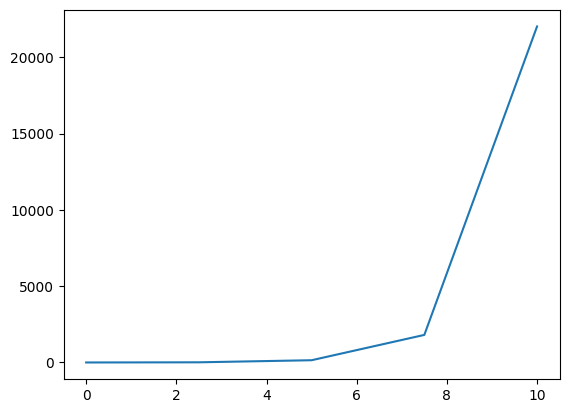

In [8]:
x = torch.linspace(0, 10, 5) # numpy와 굉장히 유사한 함수들 많음
y = torch.exp(x)

import matplotlib.pyplot as plt
# plt.plot(x,y)
plt.plot(x.numpy(), y.numpy()) # tensor와 ndarray 둘다 가능. 변환도 가능.
plt.show()

In [ ]:
# 모든 값이 0인 3 x 5의 텐서를 작성하여 to 메소드로 GPU에 전송
torch.zeros(3, 5).to("cuda:0")
# :tensor([[0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.]], device='cuda:0')

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')

In [ ]:
# normal distribution으로 3 x 5 텐서를 작성
torch.manual_seed(0)
torch.randn(3, 5)

tensor([[ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845],
        [-1.3986,  0.4033,  0.8380, -0.7193, -0.4033],
        [-0.5966,  0.1820, -0.8567,  1.1006, -1.0712]])

In [16]:
# 텐서의 shape은 size 메서드로 확인
t = torch.randn(3, 5)

print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

2
torch.Size([3, 5])
torch.Size([3, 5])


- 텐서는 Numpy의 ndarray로 쉽게 변환할 수 있습니다.
- 단, GPU상의 텐서는 그대로 변환할 수 없으며, CPU로 이동 후에 변환해야 합니다.

In [ ]:
# numpy를 사용하여 ndarray로 변환
t = torch.tensor([[1,2],[3,4.]])
x = t.numpy() # .numpy() 사용하여 ndarray 변환가능.
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [20]:
# GPU 상의 텐서는 to 메서드로 CPU의 텐서로 변환 후 ndarray로 변환해야 합니다.
t = torch.tensor([[1,2],[3,4.]], device="cuda:0")
x = t.to("cpu").numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

## 텐서의 인덱스 조작

- 텐서의 인덱스를 조작하는 방법은 여러가지가 있습니다.
- 텐서는 Numpy의 ndarray와 같이 조작하는 것이 가능합니다. 배열처럼 인덱스를 바로지정 가능하고 슬라이스, 마스크 배열을 사용할 수 있습니다.

In [24]:
t = torch.tensor([[1,2,3],[4,5,6.]])

# 인덱스 접근
t[0, 2]
# : tensor(3.)

tensor(3.)

In [23]:
# 슬라이스로 접근
t[:, :2]
# : tensor([[1., 2.],
#         [4., 5.]])

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

- `mask` 기능 활용
- `torch.masked_select(input, mask)` 함수를 이용하여 선택할 영역에는 `True`을 미선택할 영역은 `False`을 입력 합니다.
- 인풋 영역과 마스크할 영역의 크기는 같아야 오류 없이 핸들링 할 수 있습니다.

In [ ]:
# 마스크 배열(t와 shape이 똑같은) 을 이용하여 True 값만 추출
t[t > 3]
# : tensor([4., 5., 6.])

tensor([4., 5., 6.])

In [27]:
x = torch.randn(2,3)

# mask는 0,1 값을 가지고 ByteTensor를 이용하여 생성합니다.
# (0,3)과 (1,1) 데이터 인덱싱
mask = torch.tensor([[False, False, True], [False, True, False]])

torch.masked_select(x, mask)
# tensor([-0.3964,  0.1522])

tensor([ 0.3731, -1.5091])

- `torch.index_select` 활용

In [32]:
torch.manual_seed(0)
# torch.index_select(input, dim, index)
x = torch.rand(4,3)
# tensor([[0.4963, 0.7682, 0.0885],
#         [0.1320, 0.3074, 0.6341],
#         [0.4901, 0.8964, 0.4556],
#         [0.6323, 0.3489, 0.4017]])

# 3번째 인자에는 torch.LongTensor를 이용하여 인덱스를 입력해 줍니다.
torch.index_select(x,0,torch.LongTensor([0,2])) # dim = 0 : 행방향
# tensor([[0.4963, 0.7682, 0.0885],
#        [0.4901, 0.8964, 0.4556]])


torch.index_select(x,1,torch.LongTensor([0,2]))

tensor([[0.4963, 0.0885],
        [0.1320, 0.6341],
        [0.4901, 0.4556],
        [0.6323, 0.4017]])

- 슬라이스 혹은 마스크를 사용하여 일괄 대입

In [33]:
# 슬라이스를 이용하여 일괄 대입
t[:, 1] = 10
t

tensor([[ 1., 10.,  3.],
        [ 4., 10.,  6.]])

In [34]:
# 마스크 배열을 사용하여 일괄 대입
t[t > 5] = 20
t

tensor([[ 1., 20.,  3.],
        [ 4., 20., 20.]])

## 텐서 연산

- 텐서는 Numpy의 ndarray와 같이 다양한 수학 연산이 가능하며 GPU를 사용할 시에는 더 빠른 연산이 가능합니다.
- 텐서에서의 사칙연산은 같은 타입의 텐서 간 또는 텐서와 파이썬의 스칼라 값 사이에서만 가능합니다.
  + 텐서간이라도 <u>타입이 다르면 연산이 되지 않습니다<u>. FloatTensor와 DoubleTensor간의 사칙연산은 오류가 발생합니다.

In [36]:
# 길이 3인 벡터
v = torch.tensor([1,2,3.])
w = torch.tensor([0, 10, 20])

# 2 x 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])

# 제곱
v2 = v ** 2
v2

tensor([1., 4., 9.])

- `+` 혹은 `torch.add()`

In [ ]:
# 동일 길이의 벡터간 덧셈 연산
z =  v + w
z

tensor([ 1., 12., 23.])

In [ ]:
# add
torch.add(v, w)

tensor([ 1., 12., 23.])

In [ ]:
# 벡터와 스칼라의 덧셈 (broadcasting)
v2 = v + 10
v2

tensor([11., 12., 13.])

In [37]:
# (2, 3)인 행렬과 (3,)인 벡터간의 덧셈이므로 브로드캐스팅 발생
m + v
# :tensor([[  1.,   3.,   5.],
#        [101., 202., 303.]])

tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])

In [ ]:
# sub
torch.sub(v, w)

tensor([  1.,  -8., -17.])

- `*` 연산자 또는 `torch.mul()`
  + element-wise 곱셈을 뜻함.

In [ ]:
# * 연산자
v * w

tensor([ 0., 20., 60.])

In [ ]:
# 벡터와 스칼라의 곱셈 (broadcasting)
torch.mul(v, 10)

tensor([10., 20., 30.])

In [ ]:
# 행렬과 스칼라 곱
m2 = m * 2.0
m2

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

In [ ]:
# torch.mul()
torch.mul(m, m2)

tensor([[0.0000e+00, 2.0000e+00, 8.0000e+00],
        [2.0000e+04, 8.0000e+04, 1.8000e+05]])

- `/`연산자 혹은 `torch.div()`

In [38]:
# / 연산자
w/v

tensor([0.0000, 5.0000, 6.6667])

In [39]:
torch.div(w,v)

tensor([0.0000, 5.0000, 6.6667])

In [40]:
# 여러 가지 조합
u = 2 * v - w / 10 + 6.0
u

tensor([ 8.,  9., 10.])

- power 연산 : `torch.pow(input,exponent)`

In [41]:
x1 = torch.FloatTensor([ [1,2,3], [4,5,6] ])

x1**2
# torch.pow(x1,2)

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])

- exponential 연산 : `torch.exp(tensor)`

In [ ]:
x1 = torch.FloatTensor([ [1,2,3], [4,5,6] ])
torch.exp(x1)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

- log 연산 : `torch.log(input)`

In [ ]:
x1 = torch.FloatTensor([[1,2,3], [4,5,6]])
torch.log(x1)

tensor([[0.0000, 0.6931, 1.0986],
        [1.3863, 1.6094, 1.7918]])

- 행렬 곱 : `torch.mm()` 혹은 `matmul`

In [42]:
# 행렬 곱
m1 = torch.tensor([[1, 2], [3, 4.]])
m2 = torch.tensor([[1], [2.]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1

print(m1.matmul(m2)) # 2 x 1
print(torch.mm(m1, m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
tensor([[ 5.],
        [11.]])


- batch matrix multiplication : `torch.bmm(batch1, batch2)`
- Tensor(행렬)의 곱을 batch 단위로 처리합니다. `torch.mm`에서는 단일 Tensor(행렬)로 계산을 한 반면에 batch 단위로 한번에 처리하므로 좀 더 효율적입니다.

In [45]:
x1 = torch.FloatTensor(10,3,4) # batch size = 10 : 3x4 행렬이 10개씩 있음. x1,x2의 행렬별 행렬곱 가능.
x2 = torch.FloatTensor(10,4,5)
x3 = torch.bmm(x1,x2)
torch.bmm(x1,x2).size()

torch.Size([10, 3, 5])

- `torch.dot(tensor1,tensor2)`는 두 tensor의 dot product 연산을 수행합니다.

In [46]:
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))

tensor(7)

- eigenvalue와 eigenvector를 구하는 방법은 아래와 같습니다.

In [47]:
x1 = torch.FloatTensor(4,4)
torch.linalg.eig(x1)

torch.return_types.linalg_eig(
eigenvalues=tensor([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]),
eigenvectors=tensor([[ 0.0000e+00+0.j,  4.2656e-13+0.j, -4.2656e-13+0.j,  0.0000e+00+0.j],
        [ 1.0000e+00+0.j, -1.0000e+00+0.j,  1.0000e+00+0.j, -1.0000e+00+0.j],
        [ 0.0000e+00+0.j,  0.0000e+00+0.j,  1.8499e-31+0.j,  0.0000e+00+0.j],
        [ 0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  1.1698e-06+0.j]]))

- 평균 / 합계 / 최대값

In [48]:
# 평균
m1.mean()
# : tensor(2.5000)

m1.mean(dim=1)
# : tensor([1.5000, 3.5000])

tensor([1.5000, 3.5000])

In [ ]:
# 합계
m1.sum()
# : tensor(10.)

m1.sum(dim=-1)
# : tensor([3., 7.])

tensor([3., 7.])

In [ ]:
# 최대값
m1.max()
# : tensor(4.)

m1.max(dim=1)
m1.max(dim=1)[0] # 최대값
m1.max(dim=1)[1] # 최대값 인덱스 (argmax)

tensor([1, 1])

- `broadcasting` : 불가피하게 크기가 다른 행렬 또는 텐서에 대해서 사칙 연산을 수행할 필요할 때, 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하게 된다.

In [49]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

# 브로드캐스팅 과정에서 실제로 두 텐서가 어떻게 변경되는지 보겠습니다.
# [1, 2]
# ==> [[1, 2],
#      [1, 2]]
# [3]
# [4]
# ==> [[3, 3],
#      [4, 4]]

tensor([[4., 5.],
        [5., 6.]])


## 텐서의 차원 조작 **중요**

- 텐서의 차원을 변경하는 `view`나 텐서를 결합하는 `stack`, `cat`, 차원을 교환하는 `t`, `transpose`도 사용됩니다.
- `view`는 numpy의 `reshape`와 유사합니다. 물론 pytorch에도 `reshape` 기능이 있으므로 `view`를 사용하던지 `reshape`을 사용하던지 사용방법은 같으므로 선택해서 사용하면 됩니다.
- `cat`은 다른 길이의 텐서를 하나로 묶을 때 사용합니다.
- `transpose`는 행렬의 전치 외에도 차원의 순서를 변경할 때에도 사용됩니다.

In [50]:
x1 = torch.tensor([[1, 2], [3, 4.]])

x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]])

# 2 x 2 행렬을 4 x 1로 변형합니다.
x1.view(4,1)
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])

x1.reshape(4,1)
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [51]:
# 2 x 2 행렬을 1차원 벡터로 변형합니다.
x1.view(-1)
# tensor([1,2,3,4])

x1.reshape(-1)
# tensor([1,2,3,4])

tensor([1., 2., 3., 4.])

In [ ]:
# -1을 사용하면 shape에서 자동 계산 가능한 부분에 한해서 자동으로 입력 됩니다. (1 x x1크기에 맞는 열 개수)
# 계산이 불가능 하면 오류가 발생합니다.
x1.view(1, -1)
# tensor([[1., 2., 3., 4.]])

x1.reshape(1, -1)
# tensor([[1., 2., 3., 4.]])

tensor([[1., 2., 3., 4.]])

In [ ]:
x2

tensor([[10., 20., 30.],
        [40., 50., 60.]])

In [ ]:
# 2 x 3 행렬을 전치해서 3 x 2 행렬을 만듭니다.
x2.t()
# tensor([[10., 40.],
#         [20., 50.],
#         [30., 60.]])

# dim = 1 로 결합하면 2 x 5의 행렬로 묶을 수 있습니다. (x1 : 2x2, x2 : 2x3 를 column 기준 묶기)
torch.cat([x1, x2], dim=1)
# tensor([[ 1.,  2., 10., 20., 30.],
#         [ 3.,  4., 40., 50., 60.]])

tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [52]:
# transpose(dim0, dim1)을 사용하면 dim0의 차원과 dim1의 차원을 교환합니다.
# transpose(0, 3) 이라고 하면 0차원과 3차원을 교환하게 됩니다.
# 아래 예제는 HWC(높이, 너비, 컬러) 차원을 CHW(컬러, 높이, 너비)로 변형하는 예제입니다.
hwc_img_data = torch.rand(100, 64, 32, 3)

chw_img_data = hwc_img_data.transpose(1,2).transpose(1,3) # 1,2차원을 바꾼 후 다시 1차원과 3차원교체
chw_img_data.size()
# torch.Size([100, 3, 64, 32])

torch.Size([100, 3, 64, 32])

## Tensor 생성

- Tensor를 생성할 때 대표적으로 사용하는 함수가 `rand`, `zeros`, `ones` 입니다. 이 때, 첫 인자는 dimension 입니다.
- 각 dimension은 tuple 형태로 묶어서 지정해 주어도 되고 콤마 형태로 풀어서 지정해 주어도 됩니다.
- 예를 들어 `torch.rand((2, 3))`와 `torch.rand(2, 3)` 모두 같은 shape인 (2, 3)을 가집니다.

In [54]:
x = torch.rand(2,3)
print(x)

tensor([[0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298]])


In [ ]:
torch.torch.randperm(5) # random하게 permutation

tensor([4, 2, 0, 1, 3])

In [55]:
zeros = torch.zeros(2,3)
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [56]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [57]:
# torch.arange(start,end,step=1) -> [start,end) with step
# torch.arange(시작, 끝, step)을 인자로 사용하며 시작은 이상, 끝은 미만의 범위를 가지고 step만큼 간격을 두며 Tensor를 생성합니다.
torch.arange(0,3,step=0.5)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])

## Tensor 데이터 타입


In [58]:
# 2행 3열의 Float 타입의 Tensor 생성
torch.cuda.FloatTensor(2,3)

# : tensor([[2.0000e+00, 3.0000e+00, 1.4013e-45],
#         [0.0000e+00, 0.0000e+00, 0.0000e+00]], device='cuda:0')

<ipython-input-58-d27af4e2919c>:2: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:78.)
  torch.cuda.FloatTensor(2,3)


tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

In [59]:
# 리스트를 입력하여 특정 리스트를 Tensor로 변환하기
torch.cuda.FloatTensor([2,3])
# : tensor([2., 3.], device='cuda:0')

tensor([2., 3.], device='cuda:0')

In [60]:
# Float 타입을 Int 타입으로 형변환
x = torch.cuda.FloatTensor([2,3])
x.type_as(torch.cuda.IntTensor())
#
# : tensor([2, 3], device='cuda:0', dtype=torch.int32)

tensor([2, 3], device='cuda:0', dtype=torch.int32)

## Numpy to Tensor 또는 Tensor to Numpy

In [62]:
import numpy as np
x1 = np.ndarray(shape=(2,3), dtype=int, buffer=np.array([1,2,3,4,5,6]))
# x1 = np.array([[1,2,3],[4,5,6]])
# array([[1, 2, 3],
#        [4, 5, 6]])

torch.from_numpy(x1)
# tensor([[1, 2, 3],
#         [4, 5, 6]], dtype=torch.int32)


tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x2 = torch.from_numpy(x1)
x2.numpy()
# array([[1, 2, 3],
#        [4, 5, 6]])

x2.float()
# tensor([[1., 2., 3.],
#         [4., 5., 6.]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

## Join(cat, stack)

- PyTorch에서 `torch.cat(seq, dim)`을 이용하여 concaternate 연산을 할 수 있습니다.
- `dim`은 concaternate할 방향을 정합니다.

In [63]:
x = torch.cuda.FloatTensor([[1, 2, 3], [4, 5, 6]])
y = torch.cuda.FloatTensor([[-1, -2, -3], [-4, -5, -6]])
z1 = torch.cat([x, y], dim=0)
# tensor([[ 1.,  2.,  3.],
#         [ 4.,  5.,  6.],
#         [-1., -2., -3.],
#         [-4., -5., -6.]], device='cuda:0')
z1

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')

In [64]:
z2 = torch.cat([x, y], dim=1)
# tensor([[ 1.,  2.,  3., -1., -2., -3.],
#         [ 4.,  5.,  6., -4., -5., -6.]], device='cuda:0')
z2

tensor([[ 1.,  2.,  3., -1., -2., -3.],
        [ 4.,  5.,  6., -4., -5., -6.]], device='cuda:0')

- `torch.stack`을 이용하여도 concaternate를 할 수 있습니다.

In [67]:
# torch.stack(sequence,dim=0) -> stack along new dim
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_stack = torch.stack([x,x,x,x],dim=0)
x_stack.shape


# tensor([[[1., 2., 3.],
#          [4., 5., 6.]],

#         [[1., 2., 3.],
#          [4., 5., 6.]],

#         [[1., 2., 3.],
#          [4., 5., 6.]],

#         [[1., 2., 3.],
#          [4., 5., 6.]]])

torch.Size([4, 2, 3])

## slicing 기능 사용 방법

- slicing 기능은 Tensor를 몇개의 부분으로 나뉘는 기능입니다.
- `torch.chunk(tensor, chunks, dim=0)` 또는 `torch.split(tensor,split_size,dim=0)`함수를 이용하여 Tensor를 나뉠 수 있습니다.

In [69]:
z1

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')

In [70]:
# torch.chunk(tensor, chunks, dim=0) -> tensor into num chunks

x1, x2 = torch.chunk(z1,2,dim=0)


print(z1)
#   1  2  3
#   4  5  6
#  -1 -2 -3
#  -4 -5 -6
#  [torch.FloatTensor of size 4x3]

print(x1)
#   1  2  3
#   4  5  6
#  [torch.FloatTensor of size 2x3],

print(x2)
#  -1 -2 -3
#  -4 -5 -6
#  [torch.FloatTensor of size 2x3]

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')


In [ ]:
y1, y2, y3 = torch.chunk(z1,3,dim=1)

print(y1)
#   1
#   4
#  -1
#  -4
#  [torch.FloatTensor of size 4x1],

print(y2)
#   2
#   5
#  -2
#  -5
#  [torch.FloatTensor of size 4x1]

print(y3)
#   3
#   6
#  -3
#  -6
#  [torch.FloatTensor of size 4x1]

tensor([[ 1.],
        [ 4.],
        [-1.],
        [-4.]], device='cuda:0')
tensor([[ 2.],
        [ 5.],
        [-2.],
        [-5.]], device='cuda:0')
tensor([[ 3.],
        [ 6.],
        [-3.],
        [-6.]], device='cuda:0')


## 스퀴즈(Squeeze) - 1인 차원을 제거

- squeeze 함수를 사용하면 dimension 중에 1로 되어 있는 것을 압축할 수 있습니다.
- dimension이 1이면 사실 불필요한 차원일 수 있기 때문에 squeeze를 이용하여 압축 시키는 것이 때론 필요할 수 있는데, 그 때 사용하는 함수 입니다.
- `torch.squeeze(input, dim)`으로 사용할 수 있고, dim을 지정하지 않으면 dimeion이 1인 모든 차원을 압축하고 dim을 지정하면 지정한 dimension만 압축합니다.

In [71]:
# ex) [[1,2,3,4,]] -> [1,2,3,4]

x = torch.zeros(2, 1, 2, 1, 2)
x.size()

torch.Size([2, 1, 2, 1, 2])

In [73]:
y = torch.squeeze(x)
print(y)
y.size()

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


torch.Size([2, 2, 2])

In [ ]:
y = torch.squeeze(x, 0) # 0번째 차원 스퀴즈하고싶지만 2이기에 변화없음.
y.size()

torch.Size([2, 1, 2, 1, 2])

In [ ]:
y = torch.squeeze(x, 1) # 1번째 차원 스퀴즈
y.size()

torch.Size([2, 2, 1, 2])

## 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가

In [76]:
#[1,2,3,4] -> [[1,2,3,4]]

x = torch.zeros(2,3,4)
print(x)
x.size()

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


torch.Size([2, 3, 4])

In [77]:
y = torch.unsqueeze(x, 0)
print(y)
y.size()

tensor([[[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]])


torch.Size([1, 2, 3, 4])

In [78]:
x = torch.tensor([1, 2, 3, 4])
x.size()

torch.Size([4])

In [79]:
y = torch.unsqueeze(x, 0) # 0번째 차원에 1추가
y.size()

torch.Size([1, 4])

In [ ]:
y = torch.unsqueeze(x, 1)
y.size()

torch.Size([4, 1])

# gather 기능 사용

- `torch.gather` 함수는 tensor에서 인덱스를 기준으로 특정 값들을 추출하기 위해 사용됩니다.

- `gather` 함수를 사용할 때, 첫번째 인자는 `tensor`가 입력이 되고 두번째 인자는 조회할 차원(0, 1, 2, …)을 입력하면 되며 입력할 `tensor`의 차원을 입력한다고 생각하면 됩니다. 세번째 인자는 index를 `tensor` 타입으로 입력하면 됩니다.

In [80]:
A = torch.arange(1, 10)
indices = torch.tensor([0, 3, 5, 6])
print(torch.gather(A, 0, indices))
# tensor([1, 4, 6, 7])

tensor([1, 4, 6, 7])


In [81]:
A

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

- 위 코드를 살펴보면 indices에 해당하는 인덱스를 조회하는 것을 알 수 있습니다.

In [83]:
A = torch.arange(25).reshape(5, 5)
# tensor([[ 0,  1,  2,  3,  4],
#         [ 5,  6,  7,  8,  9],
#         [10, 11, 12, 13, 14],
#         [15, 16, 17, 18, 19],
#         [20, 21, 22, 23, 24]])
indices = torch.tensor([
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 3],
    [3, 4, 1],
    [0, 0, 0]
])

print(torch.gather(A, 1, indices)) # 열방향에서 0,1,2 슬라이싱, 1,2,3 슬라이싱 ...
# tensor([[ 0,  1,  2],
#         [ 6,  7,  8],
#         [12, 13, 13],
#         [18, 19, 16],
#         [20, 20, 20]])

tensor([[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 13],
        [18, 19, 16],
        [20, 20, 20]])


In [84]:
torch.gather(A, 0, indices)

tensor([[ 0,  6, 12],
        [ 5, 11, 17],
        [10, 16, 17],
        [15, 21,  7],
        [ 0,  1,  2]])

- indeces를 살펴보면 A tensor의 같은 크기이며 인덱스의 정보가 저장되어 있습니다. 예를 들어 indices의 0번째 행을 보면 0, 1, 2 인덱스가 있고 A의 0번째 행의 0, 1, 2 열의 값을 가져오면 0, 1, 2가 되는 것을 확인할 수 있습니다. 또한 indices의 마지막 행을 보면 0, 0, 0 인덱스가 있고 A의 마지막 행의 0, 0, 0 열을 가져오면 20, 20, 20이 되는 것을 확인할 수 있습니다.
- 아래는 3차원의 예제이며 차원이 늘어나면 그 늘어난 차원에 대응하여 인덱싱을 하면 됩니다.

In [ ]:
A = torch.arange(27).reshape(3, 3, 3)
# tensor([[[ 0,  1,  2],
#          [ 3,  4,  5],
#          [ 6,  7,  8]],

#         [[ 9, 10, 11],
#          [12, 13, 14],
#          [15, 16, 17]],

#         [[18, 19, 20],
#          [21, 22, 23],
#          [24, 25, 26]]])

indices = torch.tensor([
    [[0,0,0],[1,1,1],[2,2,2]],
    [[1,1,1],[2,2,2,],[0,0,0]],
    [[0,1,2],[0,1,2],[0,1,2]]])

torch.gather(A, 2, indices)
# tensor([[[ 0,  1,  2],
#          [ 3,  4,  5],
#          [ 6,  7,  8]],

#         [[ 9, 10, 11],
#          [12, 13, 14],
#          [15, 16, 17]],

#         [[18, 19, 20],
#          [21, 22, 23],
#          [24, 25, 26]]])

tensor([[[ 0,  0,  0],
         [ 4,  4,  4],
         [ 8,  8,  8]],

        [[10, 10, 10],
         [14, 14, 14],
         [15, 15, 15]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

# expand와 repeat 기능 사용 방법
- `expand`와 `repeat`은 torch에서 값을 반복시키는 대표적인 연산입니다.
- 먼저 `expand`는 특정 텐서를 반복하여 생성하며 개수가 1인 차원에만 적용하여 반복할 수 있습니다.
  + 아래와 같이 (3, 1) 크기에서 1에 해당하는 차원을 4의 크기로 확대하면 기존에 가지고 있던 값이 복사되게 됩니다.
  + 앞에서 설명한 바와 같이 차원이 1인 곳에만 적용 가능하므로 크기를 늘릴 차원에만 그 크기만큼 숫자를 입력하고 변함이 없는 차원은 -1로 입력하는 것이 쉽게 사용할 수 있는 방법입니다.

In [85]:
x = torch.tensor([[1], [2], [3]])
x.size()
#  torch.Size([3, 1])
x

tensor([[1],
        [2],
        [3]])

In [ ]:
x.expand(3, 4)
# tensor([[1, 1, 1, 1],
#         [2, 2, 2, 2],
#         [3, 3, 3, 3]])


tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [ ]:
x.expand(-1, 4) # 변화시키고자 하는 차원을 4로 고치고 나머지 -1로 하면 편함.
# tensor([[1, 1, 1, 1],
#         [2, 2, 2, 2],
#         [3, 3, 3, 3]])

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [86]:
torch.manual_seed(0)
y = torch.rand(3, 1, 1)
print(y)

y.expand(-1, 3, 4)

tensor([[[0.4963]],

        [[0.7682]],

        [[0.0885]]])


tensor([[[0.4963, 0.4963, 0.4963, 0.4963],
         [0.4963, 0.4963, 0.4963, 0.4963],
         [0.4963, 0.4963, 0.4963, 0.4963]],

        [[0.7682, 0.7682, 0.7682, 0.7682],
         [0.7682, 0.7682, 0.7682, 0.7682],
         [0.7682, 0.7682, 0.7682, 0.7682]],

        [[0.0885, 0.0885, 0.0885, 0.0885],
         [0.0885, 0.0885, 0.0885, 0.0885],
         [0.0885, 0.0885, 0.0885, 0.0885]]])

- `expand` 연산은 차원이 1인 어떤 차원의 값을 원하는 사이즈 만큼 같은 값으로 채우는 반면 `repeat` 연산은 어떤 tensor를 완전히 반복하여 값을 채웁니다.

In [89]:
torch.manual_seed(0)
yx = torch.rand(2, 3)
print(yx)
yx.repeat(3, 2, 2)

# yx.repeat(3, 2, 2).size()
# torch.Size([3, 4, 6])

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])


torch.Size([3, 4, 6])

In [ ]:
yx.repeat(3, 2, 2)

tensor([[[0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341],
         [0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341]],

        [[0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341],
         [0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341]],

        [[0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341],
         [0.4963, 0.7682, 0.0885, 0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341, 0.1320, 0.3074, 0.6341]]])

In [ ]:
yx.repeat(3, 2, 2).shape
# torch.Size([3, 4, 6])

torch.Size([3, 4, 6])

- `expand`와 `repeat`은 기존의 tensor를 이용하여 더 큰 크기의 tensor를 만든다는 점에서 같지만 내부적인 동작 방식에 의한 큰 차이가 있습니다.
- `expand`의 경우 원본 tensor를 참조하여 만들기 때문에 원본 tensor의 값이 변경이 되면 `expand`의 값 또한 변경됩니다.
- 반면 `repeat`은 깊은 복사로 만들어지기 때문에 원본 tensor가 변경되더라도 값 변경이 발생하지 않습니다. 아래 코드를 참조하시기 바랍니다.

In [91]:
torch.manual_seed(0)
a = torch.rand(1, 1, 3)
# tensor([[[0.5504, 0.9687, 0.1062]]])
b = a.expand(4, -1, -1)
c = a.repeat(4, 1, 1)

print(b.shape)
# torch.Size([4, 1, 3])
print(c.shape)
# torch.Size([4, 1, 3])

a[0, 0, 0] = 0
print(a)
# tensor([[[0.0000, 0.9687, 0.1062]]])

print(b) # expand의 결과 : 원본 tensor 변화 시 값 변경
# tensor([[[0.0000, 0.9687, 0.1062]],

#         [[0.0000, 0.9687, 0.1062]],

#         [[0.0000, 0.9687, 0.1062]],

#         [[0.0000, 0.9687, 0.1062]]])

print(c) # repeat의 결과 : 원본 tensor 변화 시 값 변경 X, 변경전 텐서를 반복한거니까.
# tensor([[[0.5504, 0.9687, 0.1062]],

#         [[0.5504, 0.9687, 0.1062]],

#         [[0.5504, 0.9687, 0.1062]],

#         [[0.5504, 0.9687, 0.1062]]])

torch.Size([4, 1, 3])
torch.Size([4, 1, 3])
tensor([[[0.0000, 0.7682, 0.0885]]])
tensor([[[0.0000, 0.7682, 0.0885]],

        [[0.0000, 0.7682, 0.0885]],

        [[0.0000, 0.7682, 0.0885]],

        [[0.0000, 0.7682, 0.0885]]])
tensor([[[0.4963, 0.7682, 0.0885]],

        [[0.4963, 0.7682, 0.0885]],

        [[0.4963, 0.7682, 0.0885]],

        [[0.4963, 0.7682, 0.0885]]])


# topk 기능 사용 방법

- `topk`는 tensor에서 값이 가장 큰 k 개를 추출하는 연산을 의미합니다. 이 연산을 이용하여 feature에서 의미가 가장 큰 k를 추출하는 post processing에서 유용하게 사용할 수 있습니다.

In [92]:
x = torch.arange(1., 6.)
# tensor([ 1.,  2.,  3.,  4.,  5.])

values, indices = torch.topk(x, 3) # 가장 큰 3개의 값과 그 위치를 추출.

print(values)
# tensor([5., 4., 3.])

print(indices)
# tensor([4, 3, 2])

tensor([5., 4., 3.])
tensor([4, 3, 2])


- 위 코드의 의미는 topk 함수에서 첫번째 파라미터로 입력받은 텐서 x의 dimension 별 가장 큰 3개의 값과 그 위치를 추출하는 것입니다. dimension은 3번째 인자이고 따로 입력하지 않은 경우 마지막 dimension을 사용하게 됩니다.
- 가장 큰 값이 5, 4, 3 순서로 추출되었고 그 위치 인덱스는 4, 3, 2 인것을 확인할 수 있습니다.

- `torch.gather` 함수를 이용하면 indices 값을 쉽게 사용할 수 있습니다.

In [ ]:
torch.gather(x, -1, indices) == values

tensor([True, True, True])

- 예시

In [ ]:
x = torch.rand(3, 4, 5)
y = torch.rand(3, 4, 5)

# x의 2번째 차원을 기준으로 가장 큰 값을 하나 뽑습니다.
values, indices = torch.topk(x, 1, dim=2)
# x에서 추출된 값과 똑같은 위치에서 y의 값을 하나 뽑습니다.
torch.gather(y, 2, indices)

tensor([[[0.6159],
         [0.9801],
         [0.0652],
         [0.9442]],

        [[0.4177],
         [0.7529],
         [0.6047],
         [0.2121]],

        [[0.1235],
         [0.7967],
         [0.8426],
         [0.6962]]])

# PyTorch import 모음

In [ ]:
import torch

# 다양한 비전 프로세스를 위한 데이터 모음
import torchvision

# neural network 모음. (e.g. nn.Linear, nn.Conv2d, BatchNorm, Loss functions 등등)
import torch.nn as nn

# Optimization algorithm 모음, (e.g. SGD, Adam, 등등)
import torch.optim as optim

# 파라미터가 필요없는 Function 모음
import torch.nn.functional as F

# 데이터 세트 관리 및 미니 배치 생성을 위한 함수 모음
from torch.utils.data import DataLoader

# 표준 데이터 세트 모음
import torchvision.datasets as datasets

# 데이터 세트에 적용 할 수있는 변환 관련 함수 모음
import torchvision.transforms as transforms

# tensorboard에 출력하기 위한 함수 모음
from torch.utils.tensorboard import SummaryWriter

# cudnn을 다루기 위한 값 모음
import torch.backends.cudnn as cudnn

# summary를 통한 model의 현황을 확인 하기 위함
from torchsummary import summary

# model을 onnx 로 변환하기 위함
import torch.onnx

# PyTorch 셋팅 관련 코드

In [ ]:
# pytorch 내부적으로 사용하는 seed 값 설정
torch.manual_seed(seed)

# cuda를 사용할 경우 pytorch 내부적으로 사용하는 seed 값 설정
torch.cuda.manual_seed(seed)

# GPU 셋팅 관련 코드

In [ ]:
# cuda가 사용 가능한 지 확인
torch.cuda.is_available()

# cuda가 사용 가능하면 device에 "cuda"를 저장하고 사용 가능하지 않으면 "cpu"를 저장한다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [ ]:
import os

# 멀티 GPU 사용 시 사용 가능한 GPU 셋팅 관련
# 아래 코드의 "0,1,2"는 GPU가 3개 있고 그 번호가 0, 1, 2 인 상황의 예제입니다.
# 만약 GPU가 5개이고 사용 가능한 것이 0, 3, 4 라면 "0,3,4" 라고 적으면 됩니다.
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

# 현재 PC의 사용가능한 GPU 사용 갯수 확인
torch.cuda.device_count()

# 사용 가능한 device 갯수에 맞춰서 0번 부터 GPU 할당
os.environ["CUDA_VISIBLE_DEVICES"] = ",".join(list(map(str, list(range(torch.cuda.device_count())))))

# 실제 사용할 GPU만 선택하려면 아래와 같이 입력하면 됩니다. (예시)
os.environ["CUDA_VISIBLE_DEVICES"] = "1, 4, 6"

In [ ]:
# cudnn을 사용하도록 설정. GPU를 사용하고 있으면 기본값은 True 입니다.
import torch.backends.cudnn as cudnn
cudnn.enabled = True

# inbuilt cudnn auto-tuner가 사용 중인 hardware에 가장 적합한 알고리즘을 선택하도록 허용합니다.
cudnn.benchmark = True

0